In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#API

The following dataset lists a selection of the best restaurants in Paris, at very affordable prices (less than 15 euros per menu on average).
You will use this  [API](https://adresse.data.gouv.fr/api-doc/adresse), to retrieve coordinate points (lon, lat) for each restaurants.



In [58]:
food_paris = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/food.csv").drop(columns = "Unnamed: 0")

In [59]:
food_paris.head()

,nom,adresse,code postal
0,Kodawari Tsukiji,12 Rue de Richelieu,75001 Paris
1,Café Lai’Tcha,7 Rue du Jour,75001 Paris
2,Pizz'Aria,55 Rue Montmartre,75002 Paris
3,M La Vie,85 Rue Montmartre,75002 Paris
4,Road Trip,36 Rue Poissonnière,75002 Paris


# Folium

You will now project these restaurants on a map, using the `Folium` library.

In [60]:
import folium

In [61]:
# Fonction pour concaténer adresse et code postal
def concat_address(row):
    return f"{row['adresse']}, {row['code postal']}"

food_paris['adresse_complete'] = food_paris.apply(concat_address, axis=1)


In [62]:
display(food_paris.head())

,nom,adresse,code postal,adresse_complete
0,Kodawari Tsukiji,12 Rue de Richelieu,75001 Paris,"12 Rue de Richelieu, 75001 Paris"
1,Café Lai’Tcha,7 Rue du Jour,75001 Paris,"7 Rue du Jour, 75001 Paris"
2,Pizz'Aria,55 Rue Montmartre,75002 Paris,"55 Rue Montmartre, 75002 Paris"
3,M La Vie,85 Rue Montmartre,75002 Paris,"85 Rue Montmartre, 75002 Paris"
4,Road Trip,36 Rue Poissonnière,75002 Paris,"36 Rue Poissonnière, 75002 Paris"


In [63]:
# exemple
import requests

link = 'https://api-adresse.data.gouv.fr/search/?q=728+Route+de+Villerest&postcode=42155'
r = requests.get(link).json()
print(r)

{'type': 'FeatureCollection', 'version': 'draft', 'features': [{'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [3.993163, 46.00996]}, 'properties': {'label': '728 Route de Villerest 42155 Ouches', 'score': 0.95216, 'housenumber': '728', 'id': '42162_0008_00728', 'name': '728 Route de Villerest', 'postcode': '42155', 'citycode': '42162', 'x': 776847.88, 'y': 6546063.21, 'city': 'Ouches', 'context': '42, Loire, Auvergne-Rhône-Alpes', 'type': 'housenumber', 'importance': 0.47376, 'street': 'Route de Villerest'}}, {'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [3.992892, 45.993344]}, 'properties': {'label': 'Route de Villerest 42155 Lentigny', 'score': 0.7023067532467532, 'id': '42120_0066', 'banId': 'da638fce-da8b-4ab4-8b4e-2b0ada71a470', 'name': 'Route de Villerest', 'postcode': '42155', 'citycode': '42120', 'x': 776850.11, 'y': 6544217.88, 'city': 'Lentigny', 'context': '42, Loire, Auvergne-Rhône-Alpes', 'type': 'street', 'importance': 0.43966, 'street

In [64]:
def API_adresse(adresse_postale):
    link_main = 'https://api-adresse.data.gouv.fr/search/?q='
    link = link_main + adresse_postale.replace(' ', '+')
    r = requests.get(link).json()
    return r['features'][0]['geometry']['coordinates'][::-1] # inverser la longitude et la latitude

In [65]:
food_paris["coordonnées"] = food_paris["adresse_complete"].apply(API_adresse)

In [66]:
display(food_paris.head())

,nom,adresse,code postal,adresse_complete,coordonnées
0,Kodawari Tsukiji,12 Rue de Richelieu,75001 Paris,"12 Rue de Richelieu, 75001 Paris","[48.864374, 2.336258]"
1,Café Lai’Tcha,7 Rue du Jour,75001 Paris,"7 Rue du Jour, 75001 Paris","[48.86355, 2.344247]"
2,Pizz'Aria,55 Rue Montmartre,75002 Paris,"55 Rue Montmartre, 75002 Paris","[48.865983, 2.344484]"
3,M La Vie,85 Rue Montmartre,75002 Paris,"85 Rue Montmartre, 75002 Paris","[48.867596, 2.343757]"
4,Road Trip,36 Rue Poissonnière,75002 Paris,"36 Rue Poissonnière, 75002 Paris","[48.869951, 2.34794]"


In [67]:
food_paris.shape

(29, 5)

In [68]:
initial = API_adresse("2 Rue de Richelieu, 75001 Paris")

map = folium.Map(location=initial,zoom_start=13)   # permet de centrer la carte sur l'adresse choisie

for index, row in food_paris.iterrows():
    location = API_adresse(row['adresse_complete'])

    folium.Marker(
            location = location,
            popup = f"{row['nom']}, {row['adresse_complete']}"
        ).add_to(map)
map

# Sorting and grouping

You can now build a descending ranking,  considering the number of restaurants per district.

In [69]:
# Compter les restaurants par quartier
compte_quartier = food_paris.groupby('code postal')["nom"].nunique().reset_index()

# Classer les quartiers dans l'ordre descendant
class_quartier = compte_quartier.sort_values(by='nom', ascending=False).reset_index(drop=True)
class_quartier.columns = ['Quartier', 'Nombre de restaurants']

print("Nombre de restaurants par arrondissement")
print(class_quartier)

Nombre de restaurants par arrondissement
       Quartier  Nombre de restaurants
0   75002 Paris                      5
1   75009 Paris                      4
2   75010 Paris                      4
3   75011 Paris                      3
4   75001 Paris                      2
5   75003 Paris                      2
6   75004 Paris                      2
7   75006 Paris                      2
8   75008 Paris                      2
9   75007 Paris                      1
10  75014 Paris                      1
11  75017 Paris                      1


# Data exploration & processing - Python & Pandas

Run the code below. You will get a DataFrame with 10 000 restaurant comments.
- date: the date of the comment
- stars: the rating (from 1 to 5)
- text: the text of the review
- useful: the number of users who indicated this comment as "useful"
- sentiment: the word "good" or "bad" depending on the stars rating

The goal of these parts will be to explore this dataset, then to propose a prediction model of positive rating according to the other features.

Start by checking that there are no missing values.

In [70]:
import pandas as pd
df_restaurants = pd.read_csv("https://github.com/WildCodeSchool/wilddata/raw/main/restaurant.zip", index_col='Unnamed: 0').loc[:,["date", "stars", "text", "useful"]]
df_restaurants["sentiment"] = df_restaurants["stars"].apply(lambda x: "bad" if x <=3 else "good")
df_restaurants

,date,stars,text,useful,sentiment
0,2011-01-26,5,My wife took me here on my birthday for breakf...,5,good
1,2011-07-27,5,I have no idea why some people give bad review...,0,good
2,2012-06-14,4,love the gyro plate. Rice is so good and I als...,1,good
3,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",2,good
4,2012-01-05,5,General Manager Scott Petello is a good egg!!!...,0,good
...,...,...,...,...,...
9995,2012-07-28,3,First visit...Had lunch here today - used my G...,2,bad
9996,2012-01-18,4,Should be called house of deliciousness!\n\nI ...,0,good
9997,2010-11-16,4,I recently visited Olive and Ivy for business ...,0,good
9998,2012-12-02,2,My nephew just moved to Scottsdale recently so...,0,bad


In [71]:
df_restaurants.shape

(10000, 5)

In [72]:
df_restaurants.isna().sum()

,0
date,0
stars,0
text,0
useful,0
sentiment,0


## Column "text"

Use **apply** to create a new column `len_text`, indicating the length (number of characters) of each comment.

Draw a histogram and a boxplot to represent the distribution of this "len_text" column. Are the values well distributed? Are most comments long or short?

In [73]:
df_restaurants["len_text"] = df_restaurants["text"].apply(lambda x: len(x))

In [74]:
display(df_restaurants.head())

,date,stars,text,useful,sentiment,len_text
0,2011-01-26,5,My wife took me here on my birthday for breakf...,5,good,889
1,2011-07-27,5,I have no idea why some people give bad review...,0,good,1345
2,2012-06-14,4,love the gyro plate. Rice is so good and I als...,1,good,76
3,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",2,good,419
4,2012-01-05,5,General Manager Scott Petello is a good egg!!!...,0,good,469


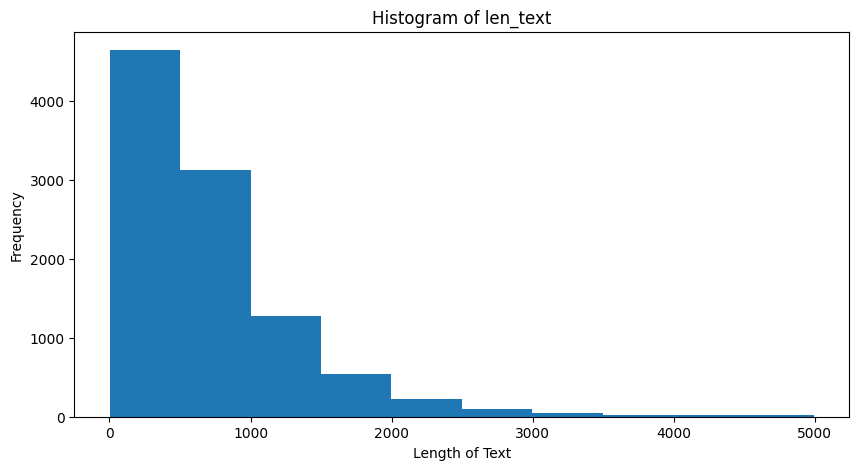

In [75]:
# histogramme

plt.figure(figsize=(10, 5))

plt.hist(df_restaurants["len_text"])
plt.title("Histogram of len_text")
plt.xlabel("Length of Text")
plt.ylabel("Frequency")

plt.show()

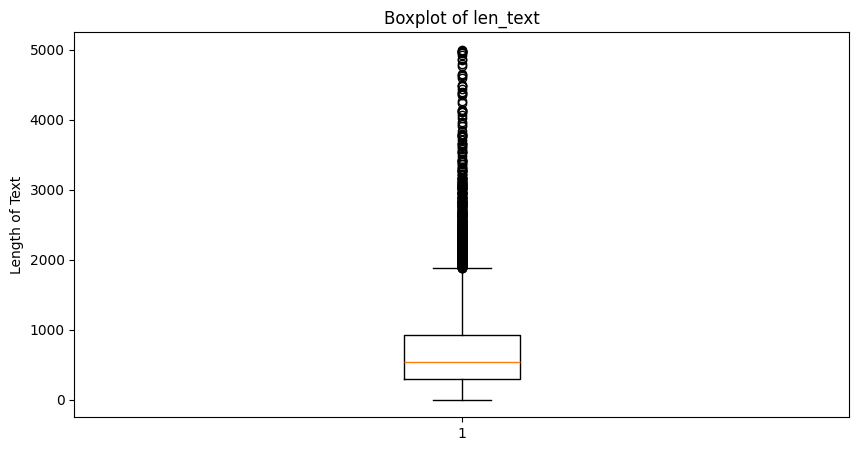

In [76]:
# boxplot

plt.figure(figsize=(10, 5))

plt.boxplot(df_restaurants["len_text"])
plt.title("Boxplot of len_text")
plt.ylabel("Length of Text")

plt.show()

Commentaires

On observe que le plus grand nombre de commentaires concerne des commentaires courts, la majorité d'entre eux comportent moins de mille caractères.

A l'inverse (et en toute logique) on trouve peu de commentaires longs (> à 2000 caractères). Ils apparaissent d'ailleurs comme des outliers



## Column "stars"

- Draw a scatterplot to compare the `useful` column and the `stars` column. Do you think there is a correlation? Please compute the correlation coefficient.

- Ditto between `len_text` and `useful`.

- Please comment and interpret the results.



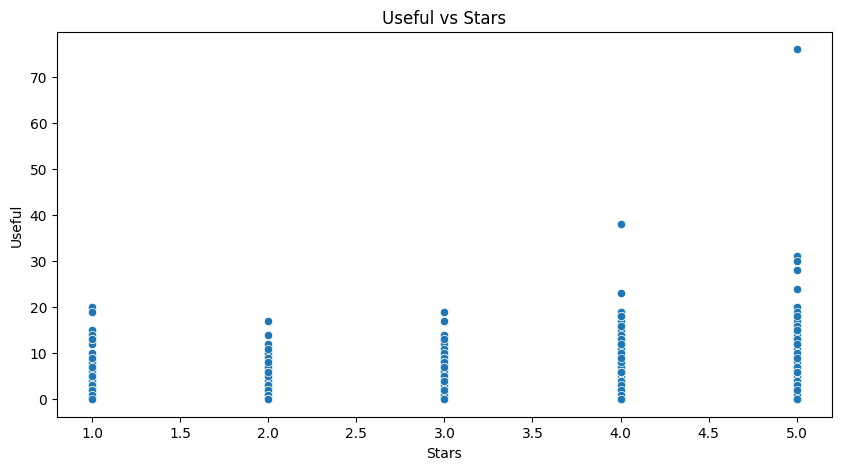

In [77]:
# Tracer le scatterplot pour "useful" vs "stars"
plt.figure(figsize=(10, 5))

sns.scatterplot(x='stars', y='useful', data=df_restaurants)
plt.title('Useful vs Stars')
plt.xlabel('Stars')
plt.ylabel('Useful')
plt.show()

In [78]:
# Calculer le coefficient de corrélation entre "useful" et "stars"
correlation_useful_stars = df_restaurants['useful'].corr(df_restaurants['stars']).round(2)
print(f"Correlation coefficient : {correlation_useful_stars}")

Correlation coefficient : -0.02


Commentaires et interprétation

A première vue le graphe laisse deviner une corrélation entre "useful" et "stars" du fait de la forme de la courbe qui semble se dessiner
On peut penser que le nombre d'étoiles influe sur l'utilité de l'avis, les avis "extrêmes" (1 et 5) ayant semble-t-il un peu plus d'importance que les valeurs "neutres" (2, 3 et 4)

Cependant le coefficient de corrélation (-0.02) indique clairement qu'il n'y a pas de tendance linéaire entre ces variables et donc que les variations d'une des variables n'est pas liée aux variations de l'autre variable

L'impression qu'on a en observant le scatterplot est donc fausse

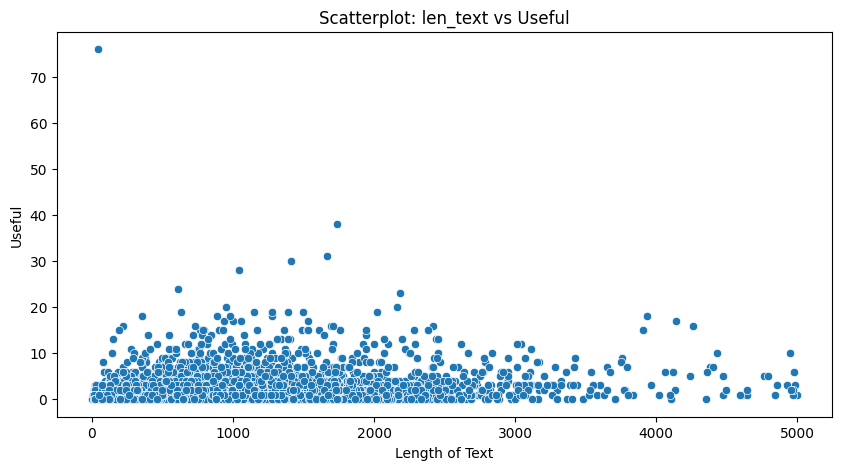

In [79]:
# Tracer le scatterplot pour "len_text" vs "useful"
plt.figure(figsize=(10, 5))
sns.scatterplot(x='len_text', y='useful', data=df_restaurants)
plt.title('Scatterplot: len_text vs Useful')
plt.xlabel('Length of Text')
plt.ylabel('Useful')
plt.show()

In [80]:
# Calculer le coefficient de corrélation entre "len_text" et "useful"
correlation_len_text_useful = df_restaurants['len_text'].corr(df_restaurants['useful']).round(2)
print(f"Correlation coefficient between 'len_text' and 'useful': {correlation_len_text_useful}")

Correlation coefficient between 'len_text' and 'useful': 0.29


Commentaires et interprétation

Ici le graph ne laisse apparaitre aucune corrélation entre la longueur du texte et son utilité

Le coefficient de corrélation montre pourtant une légère corrélation positive (0.29) entre longueur du texte et utilité ce qui signifie qu'une variation de l'une des variables entraine une légère variation de l'autre variable

Ici encore le graphe seul ne nous permet pas de décider s'il existe une relation entre variables

#NLP - Sentiment analysis classification

Define `X` which will contain only the `text` column. And `y` will be the `sentiment` column.

In [81]:
X = df_restaurants["text"]
y = df_restaurants["sentiment"]

## Create a function to clean up stopwords and punctuation

You can call your function `func_clean`.
Your function must take a `str` as a single parameter, and return a `str`.

For example:

`func_clean("Hello, how are you? Fine, thank you.")`

`>>> 'hello fine thank'`

In [82]:
!pip install processtext

In [83]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 28.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [84]:
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [85]:
import processtext as pt

In [86]:
def func_clean(str):
        return pt.clean(str,
                        extra_spaces=True,          # enlever les espace en trop
                        lemmatize=True,             # appliquer le lemmatizer
                        lowercase = True,           # mettre le texte en minuscule
                        sw = True,                  # enlever les stopwords
                        stp_lang = "english",       # les stopwords en anglais
                        numbers = True,             # enlever les chiffres
                        punct = True                # enlever la ponctuation
                      )

## Apply this function

Apply this function to `X` and store the result in `X_clean`.

In [87]:
X_clean = X.apply(func_clean)
print(X_clean)

0       wife take birthday breakfast excellent weather...
1       idea people give bad review place go show plea...
2       love gyro plate rice good also dig candy selec...
3       rosie dakota love chaparral dog park convenien...
4       general manager scott petello good egg go deta...
                              ...                        
9995    first visithad lunch today use groupon order b...
9996    call house deliciousness could go item item bl...
9997    recently visit olive ivy business last week vi...
9998    nephew move scottsdale recently bunch friends ...
9999    locations star average think arizona really fa...
Name: text, Length: 10000, dtype: object


## Train test split

Split your `X_clean` and `y` data with a train test split, and the same `random_state = 32`.



In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X_clean, y, test_size=0.25, random_state=32)

In [90]:
print(f"Longueur X_train : {len(X_train)}")
print(f"Longueur X_test : {len(X_test)}")

Longueur X_train : 7500
Longueur X_test : 2500


## TfidfVectorizer

- Train `TfidfVectorizer` on `X_train`.
- Transform `X_train` with your vectorizer and store the result in `X_train_vecto`.
- Transform `X_test` with your vectorizer and store the result in `X_test_vecto`.

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [92]:
tfidf_vectorizer = TfidfVectorizer()

# Appliquer le TfidfVectorizer aux ensembles d'entraînement et de test
X_train_vecto = tfidf_vectorizer.fit_transform(X_train)
X_test_vecto = tfidf_vectorizer.transform(X_test)

## Logistic regression

Train a logistic regression on `X_train_vecto` and `y_train`.

Please compare the accuracy scores of the training and test sets. Is there any overfitting?

Also display a confusion matrix for the test set. How many "bad" comments are correctly predicted?

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [94]:
model = LogisticRegression().fit(X_train_vecto, y_train)

In [95]:
# Faire des prédictions sur les données d'entraînement et de test
y_train_pred = model.predict(X_train_vecto)
y_test_pred = model.predict(X_test_vecto)

In [96]:
# Évaluer le modèle sur les données d'entraînement
train_accuracy = accuracy_score(y_train, y_train_pred)
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)

In [97]:
# Évaluer le modèle sur les données de test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

In [98]:
# Afficher les résultats pour les données d'entraînement
print("Évaluation sur les données d'entraînement:")
print("Accuracy:", train_accuracy)
print("Confusion Matrix:\n", train_confusion_matrix)

Évaluation sur les données d'entraînement:
Accuracy: 0.894
Confusion Matrix:
 [[1708  675]
 [ 120 4997]]


In [99]:
# Afficher les résultats pour les données de test
print("Évaluation sur les données de test:")
print("Accuracy:", test_accuracy)
print("Confusion Matrix:\n", test_confusion_matrix)

Évaluation sur les données de test:
Accuracy: 0.8368
Confusion Matrix:
 [[ 440  314]
 [  94 1652]]


Il semble y avoir un léger overfitting (0.89 pour le train, environ 0.84 pour le test)

1654 commentaires "bad" ont été correctement prédits

## Decision tree
Train a decision tree on `X_train_vecto` and `y_train`.

Please compare the accuracy scores of the training and test sets. Is there any overfitting? Are the scores better than previously?

In [100]:
from sklearn.tree import DecisionTreeClassifier        # on choisit le modèle Classifier car on veut prédire la classe d'une caractéristique

In [101]:
modelDT = DecisionTreeClassifier(random_state=32)

In [102]:
# Entraînement du modèle
modelDT.fit(X_train_vecto, y_train)

DecisionTreeClassifier(random_state=32)

In [103]:
# Prédictions sur les données d'entraînement et de test
y_train_pred = modelDT.predict(X_train_vecto)
y_test_pred = modelDT.predict(X_test_vecto)

In [104]:
# Évaluation sur les données d'entraînement
train_accuracy = accuracy_score(y_train, y_train_pred)
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)

In [105]:
# Évaluation sur les données de test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

In [106]:
# Résultats pour les données d'entraînement
print("Évaluation sur les données d'entraînement:")
print("Accuracy:", train_accuracy)
print("Confusion Matrix:\n", train_confusion_matrix)

Évaluation sur les données d'entraînement:
Accuracy: 1.0
Confusion Matrix:
 [[2383    0]
 [   0 5117]]


In [107]:
# Résultats pour les données de test
print("\nÉvaluation sur les données de test:")
print("Accuracy:", test_accuracy)
print("Confusion Matrix:\n", test_confusion_matrix)


Évaluation sur les données de test:
Accuracy: 0.698
Confusion Matrix:
 [[ 408  346]
 [ 409 1337]]


Il y a un fort overfitting car l'accuracy score est moins bon sur les données de test (+/- 0.7) par rapport au score sur les données d'entraînement (1.0)

Cela se traduit bien dans la matrice de confusion

##Bonus

Use `GridsearchCV` to find the best parameters.
Make sure you don't do more than 1000 different iterations (i.e. combinations).
Otherwise, the time may seem very long...





In [108]:
from sklearn.model_selection import GridSearchCV

In [109]:
# Définir les paramètres (honnêtement j'ai fait un peu au pif à partir des paramètres par défaut)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [110]:
# Calculer le nombre de combinaisons
num_combinations = len(param_grid['criterion']) * len(param_grid['max_depth']) * len(param_grid['min_samples_split']) * len(param_grid['min_samples_leaf'])
print(f"Total number of parameter combinations: {num_combinations}")

Total number of parameter combinations: 72


In [111]:
max_iterations = 1000
if num_combinations > max_iterations:
    print(f"Attention : le nombre de combinaisons ({num_combinations}) dépasse le nombre max d'itérations ({max_iterations}).")

grid_search = GridSearchCV(estimator=modelDT, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(X_train_vecto, y_train)


print("Meilleurs paramètres :")
print(grid_search.best_params_)
print()

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Meilleurs paramètres :
{'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2}



In [112]:
# Evaluation du meilleur modèle
meilleur_modèle = grid_search.best_estimator_
y_pred = meilleur_modèle.predict(X_test_vecto)
accuracy = accuracy_score(y_test, y_pred)
print(f"Le meilleur score est : {accuracy:.4f}, avec comme paramètres : {grid_search.best_params_}")

Le meilleur score est : 0.7164, avec comme paramètres : {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2}


#Algorithme `JSON` et manipulation.
This is a json file containing several keys.
Each key has a value, which could potentially be another key, containing another value, which could potentially be another key etc...

In [113]:
food = {
  "clé1": {
    "fruit1": "pomme",
    "légume4": "brocoli"
  },
  "clé2": {
    "légume1": "carotte",
    "fruit5": "banane",
    "légume3": "courgette"
  },
  "clé3": {
    "niveau1": {
      "niveau2": {
        "fruit3": "orange",
        "légume5": "aubergine",
        "fruit5": "mangue"
      }
    }
  },
  "clé4": {
    "niveau1": {
      "niveau2": {
        "niveau3": {
          "fruit6": "raisin",
          "fruit7": "fraise",
          "légume4": "poivron",
          "fruit2": "pastèque"
        }
      }
    }
  }
}


Problem:
Fruits and vegetables have been misplaced in this json file. The goal is to retrieve each of the fruits and vegetables, and assign them to two corresponding lists: `fruits_list` & `vegetables_list`.

Expected solution:

`fruits_list` = `['pomme', 'banane', 'orange', 'mangue', 'raisin', 'fraise', 'pastèque']`

`vegetables_list` = `['brocoli', 'carotte', 'courgette', 'aubergine', 'poivron']`



In [114]:
# on créé des listes vides
fruits_list = []
vegetables_list = []

# fonction pour "remplir" les listes
def separate_items(food):
    for key, value in food.items():
        if isinstance(value, dict):
            separate_items(value)
        else:
            if key.startswith("fruit"):
                fruits_list.append(value)
            elif key.startswith("légume"):
                vegetables_list.append(value)

separate_items(food)

In [115]:
print("Fruits List :", fruits_list)
print("Vegetables list :", vegetables_list)

Fruits List : ['pomme', 'banane', 'orange', 'mangue', 'raisin', 'fraise', 'pastèque']
Vegetables list : ['brocoli', 'carotte', 'courgette', 'aubergine', 'poivron']


Next, you'll create a new dictionary, which will simply contain two keys: `fruits` & `vegetables`. Each key will have the value of the list of fruits and the list of vegetables. That way, everything will be in order.

Expected solution:
`food_dict` = `{'fruits': ['pomme',
  'banane',
  'orange',
  'mangue',
  'raisin',
  'fraise',
  'pastèque'],
 'legumes': ['brocoli', 'carotte', 'courgette', 'aubergine', 'poivron']}`

In [116]:
# Créer un dictionnaire avec les clés "fruits" et "légumes"
# les valeurs sont les listes des fruits et légumes
food_dico = {
    "fruits": fruits_list,
    "légumes": vegetables_list
}

print("food_dict =", food_dico)

food_dict = {'fruits': ['pomme', 'banane', 'orange', 'mangue', 'raisin', 'fraise', 'pastèque'], 'légumes': ['brocoli', 'carotte', 'courgette', 'aubergine', 'poivron']}
